#Desafío Telecom X: Análisis de Evasión de Clientes

Objetivo: Analizar la base de datos de clientes de Telecom X para identificar los factores clave que influyen en la evasión (churn). Este notebook cubrirá desde la extracción de datos hasta el análisis exploratorio y la preparación de un informe final.

#📌 Extracción

In [1]:
# llamar los datos
import pandas as pd
import numpy as np
import requests

url = "https://raw.githubusercontent.com/mroma92/TelecomX_LATAM/main/TelecomX_Data.json"
response = requests.get(url)
df = response.json()

In [2]:
datos = pd.json_normalize(df, sep='_')

In [3]:
datos.sample(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
2141,2996-XAUVF,No,Male,0,No,No,70,No,No phone service,DSL,...,No,No,Yes,No,Yes,Two year,Yes,Mailed check,40.05,2799.75
4180,5730-RIITO,No,Female,1,No,No,43,No,No phone service,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),33.45,1500.25
5172,7055-VKGDA,Yes,Male,0,No,No,54,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),105.40,5643.4
5510,7552-KEYGT,No,Male,0,Yes,No,27,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.55,520.55
3026,4198-VFOEA,No,Female,0,No,No,12,No,No phone service,DSL,...,No,No,Yes,No,No,One year,Yes,Mailed check,33.60,435.45


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [5]:
datos_duplicados = datos[datos.duplicated()]
datos_duplicados

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total


In [6]:
datos.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


#🔧 Transformación

#Limpieza y Preprocesamiento de Datos
Esta es la fase más crucial. Un buen análisis depende de datos limpios. Realizaremos las siguientes tareas:

1. Renombrar columnas para que sean más cortas y legibles.
2. Estandarizar valores para mantener la consistencia.
3. Crear columna Cuentas Diarias.

In [7]:
datos.rename(columns={
    "customerID": "ID_Cliente",
    "Churn": "Evacion",
    "customer_gender": "Genero",
    "customer_SeniorCitizen": "Adulto_Mayor",
    "customer_Partner": "Tiene_Pareja",
    "customer_Dependents": "Tiene_Dependientes",
    "customer_tenure": "Meses_Conectado",
    "phone_PhoneService": "Servicio_Telefono",
    "phone_MultipleLines": "Lineas_Multiples",
    "internet_InternetService": "Servicio_Internet",
    "internet_OnlineSecurity": "Seguridad_En_Linea",
    "internet_OnlineBackup": "Respaldo_En_Linea",
    "internet_DeviceProtection": "Proteccion_Dispositivo",
    "internet_TechSupport": "Soporte_Tecnico",
    "internet_StreamingTV": "TV_Streaming",
    "internet_StreamingMovies": "Peliculas_Streaming",
    "account_Contract": "Tipo_Contrato",
    "account_PaperlessBilling": "Factura_Electronica",
    "account_PaymentMethod": "Metodo_Pago",
    "account_Charges_Monthly": "Cargos_Mensuales",
    "account_Charges_Total": "Cargos_Totales",
    "Cuentas_Diarias": "Cargos_Diarios"
}, inplace=True)


In [8]:
columnas_yes_no = [
    'Evacion',
    'Tiene_Pareja',
    'Tiene_Dependientes',
    'Servicio_Telefono',
    'Lineas_Multiples',
    'Seguridad_En_Linea',
    'Respaldo_En_Linea',
    'Proteccion_Dispositivo',
    'Soporte_Tecnico',
    'TV_Streaming',
    'Peliculas_Streaming',
    'Factura_Electronica'
]

for col in columnas_yes_no:
    print(f"Valores únicos en {col}: {datos[col].unique()}")

Valores únicos en Evacion: ['No' 'Yes' '']
Valores únicos en Tiene_Pareja: ['Yes' 'No']
Valores únicos en Tiene_Dependientes: ['Yes' 'No']
Valores únicos en Servicio_Telefono: ['Yes' 'No']
Valores únicos en Lineas_Multiples: ['No' 'Yes' 'No phone service']
Valores únicos en Seguridad_En_Linea: ['No' 'Yes' 'No internet service']
Valores únicos en Respaldo_En_Linea: ['Yes' 'No' 'No internet service']
Valores únicos en Proteccion_Dispositivo: ['No' 'Yes' 'No internet service']
Valores únicos en Soporte_Tecnico: ['Yes' 'No' 'No internet service']
Valores únicos en TV_Streaming: ['Yes' 'No' 'No internet service']
Valores únicos en Peliculas_Streaming: ['No' 'Yes' 'No internet service']
Valores únicos en Factura_Electronica: ['Yes' 'No']


In [9]:
columnas_a_limpiar = ['Lineas_Multiples', 'Seguridad_En_Linea', 'Respaldo_En_Linea', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Streaming', 'Peliculas_Streaming']
for columna in columnas_a_limpiar:
    datos[columna] = datos[columna].replace({'No internet service': 'No', 'No phone service': 'No'})

In [10]:
columnas_yes_no = [
    'Evacion',
    'Tiene_Pareja',
    'Tiene_Dependientes',
    'Servicio_Telefono',
    'Factura_Electronica'
]

for col in columnas_yes_no:
    if col == 'Churn':
        # Versión limpia para Churn usando map
        datos[col] = datos[col].map({'Yes': 1, 'No': 0})
    else:
        # Versión eficiente para otras columnas
        datos[col] = [1 if x == 'Yes' else (0 if x == 'No' else x) for x in datos[col]]

# Verificación
for col in columnas_yes_no:
    print(f"{col}: {datos[col].unique()}")

Evacion: [0 1 '']
Tiene_Pareja: [1 0]
Tiene_Dependientes: [1 0]
Servicio_Telefono: [1 0]
Factura_Electronica: [1 0]


In [11]:
# reemplaza vacío por NaN
datos['Evacion'] = datos['Evacion'].replace('', np.nan)

/tmp/ipython-input-546808433.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['Evacion'] = datos['Evacion'].replace('', np.nan)


In [12]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7267 non-null   object 
 1   Evacion                 7043 non-null   float64
 2   Genero                  7267 non-null   object 
 3   Adulto_Mayor            7267 non-null   int64  
 4   Tiene_Pareja            7267 non-null   int64  
 5   Tiene_Dependientes      7267 non-null   int64  
 6   Meses_Conectado         7267 non-null   int64  
 7   Servicio_Telefono       7267 non-null   int64  
 8   Lineas_Multiples        7267 non-null   object 
 9   Servicio_Internet       7267 non-null   object 
 10  Seguridad_En_Linea      7267 non-null   object 
 11  Respaldo_En_Linea       7267 non-null   object 
 12  Proteccion_Dispositivo  7267 non-null   object 
 13  Soporte_Tecnico         7267 non-null   object 
 14  TV_Streaming            7267 non-null   

In [13]:
# crear columna de Cuentas Diarias

datos["Cuentas_Diarias"] = (datos["Cargos_Mensuales"] / 30).round(3)

In [14]:
datos.head()

,ID_Cliente,Evacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Conectado,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3,2.187
1,0003-MKNFE,0.0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4,1.997
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463
3,0011-IGKFF,1.0,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.267
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.4,2.797


#📊 Carga y análisis

In [15]:
# analisis Descriptivo

datos.describe().round(2)

,Evacion,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Conectado,Servicio_Telefono,Factura_Electronica,Cargos_Mensuales,Cuentas_Diarias
count,7043.00,7267.00,7267.00,7267.00,7267.00,7267.0,7267.00,7267.00,7267.00
mean,0.27,0.16,0.48,0.30,32.35,0.9,0.59,64.72,2.16
std,0.44,0.37,0.50,0.46,24.57,0.3,0.49,30.13,1.00
min,0.00,0.00,0.00,0.00,0.00,0.0,0.00,18.25,0.61
25%,0.00,0.00,0.00,0.00,9.00,1.0,0.00,35.42,1.18
50%,0.00,0.00,0.00,0.00,29.00,1.0,1.00,70.30,2.34
75%,1.00,0.00,1.00,1.00,55.00,1.0,1.00,89.88,3.00
max,1.00,1.00,1.00,1.00,72.00,1.0,1.00,118.75,3.96


In [16]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7267 non-null   object 
 1   Evacion                 7043 non-null   float64
 2   Genero                  7267 non-null   object 
 3   Adulto_Mayor            7267 non-null   int64  
 4   Tiene_Pareja            7267 non-null   int64  
 5   Tiene_Dependientes      7267 non-null   int64  
 6   Meses_Conectado         7267 non-null   int64  
 7   Servicio_Telefono       7267 non-null   int64  
 8   Lineas_Multiples        7267 non-null   object 
 9   Servicio_Internet       7267 non-null   object 
 10  Seguridad_En_Linea      7267 non-null   object 
 11  Respaldo_En_Linea       7267 non-null   object 
 12  Proteccion_Dispositivo  7267 non-null   object 
 13  Soporte_Tecnico         7267 non-null   object 
 14  TV_Streaming            7267 non-null   

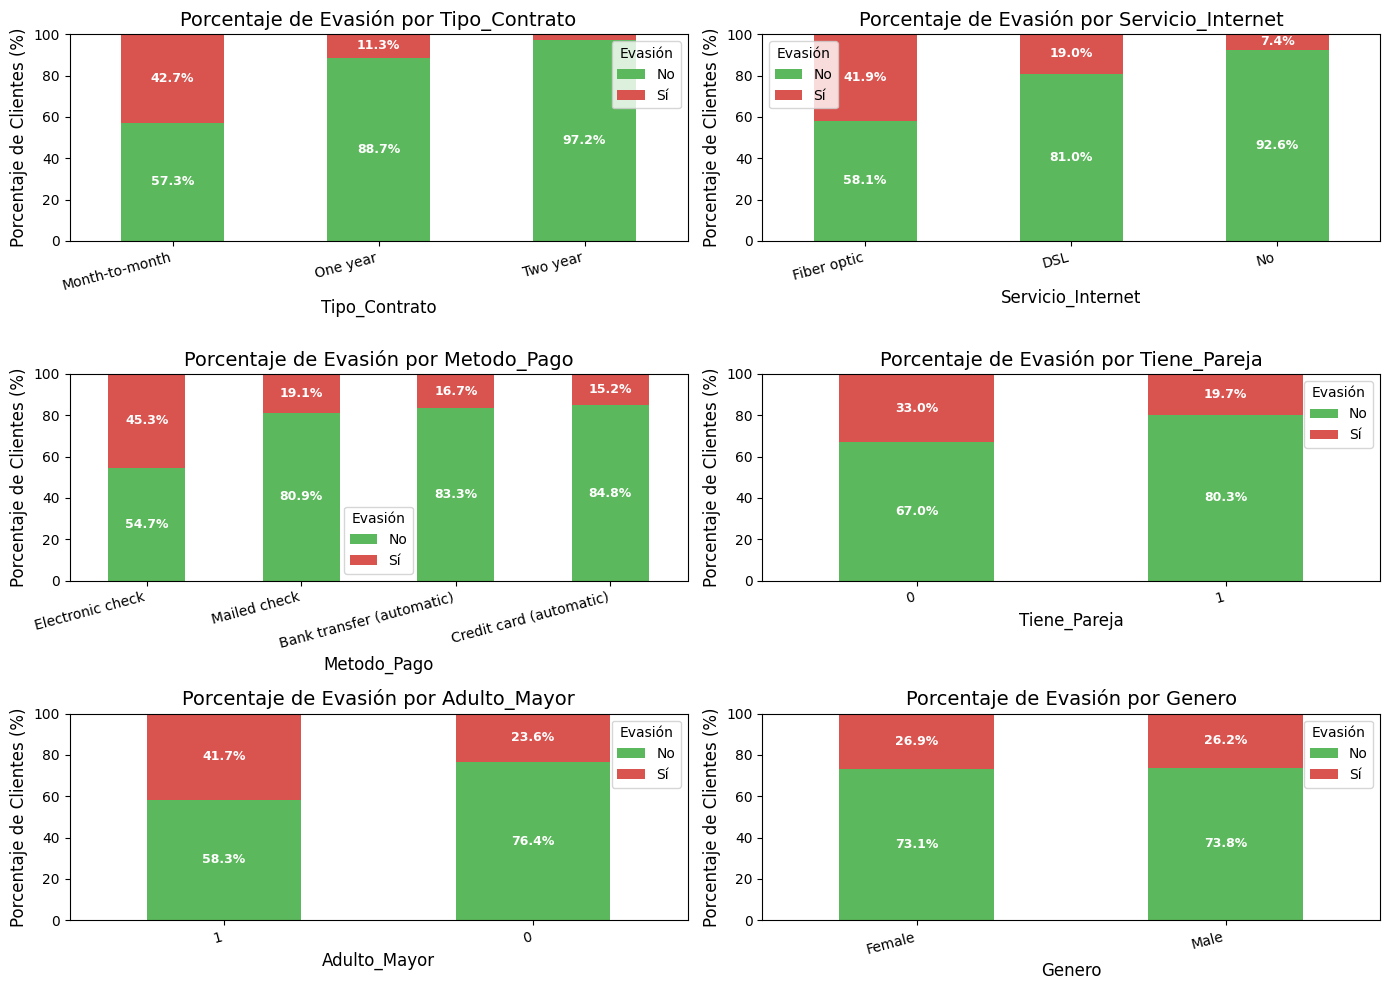

In [17]:
import matplotlib.pyplot as plt

columnas_categoricas = ['Tipo_Contrato', 'Servicio_Internet', 'Metodo_Pago', 'Tiene_Pareja', 'Adulto_Mayor', 'Genero']

fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

for i, columna in enumerate(columnas_categoricas):
    datos_agrupado = datos.groupby(columna)['Evacion'].value_counts(normalize=True).unstack() * 100

    if '1' in datos_agrupado.columns:
        datos_agrupado = datos_agrupado.sort_values(by='1', ascending=False)
    elif 1 in datos_agrupado.columns:
        datos_agrupado = datos_agrupado.sort_values(by=1, ascending=False)

    ax = datos_agrupado.plot(
        kind='bar',
        stacked=True,
        ax=axes[i],
        color=['#5cb85c', '#d9534f']
    )

    ax.set_title(f'Porcentaje de Evasión por {columna}', fontsize=14)
    ax.set_xlabel(columna, fontsize=12)
    ax.set_ylabel('Porcentaje de Clientes (%)', fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right")
    ax.legend(title='Evasión', labels=['No', 'Sí'])
    ax.set_ylim(0, 100)

    for p in ax.patches:
        height = p.get_height()
        if height > 5:
            ax.text(
                p.get_x() + p.get_width() / 2,
                p.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center', va='center',
                fontsize=9, color='white', fontweight='bold'
            )

plt.tight_layout()
plt.show()

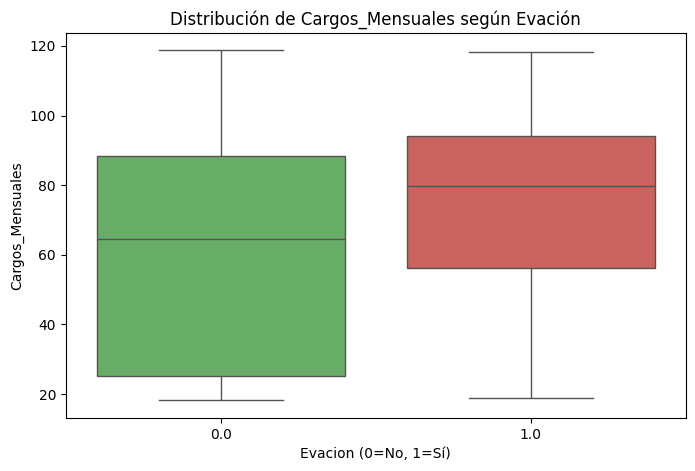

In [27]:
import seaborn as sns

variables_numericas = ['Cargos_Mensuales']

for var in variables_numericas:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Evacion', y=var, data=datos, hue='Evacion', palette={0:'#5cb85c', 1:'#d9534f'}, dodge=False, legend=False)
    plt.title(f'Distribución de {var} según Evación')
    plt.xlabel('Evacion (0=No, 1=Sí)')
    plt.ylabel(var)
    plt.show()

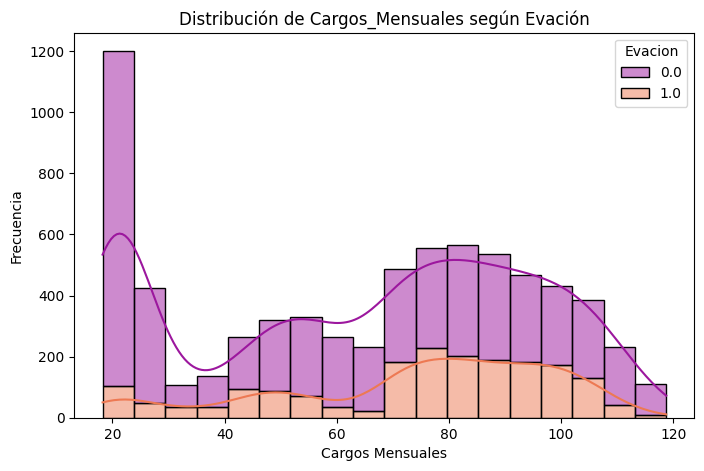

In [31]:
for var in variables_numericas:
    plt.figure(figsize=(8,5))
    sns.histplot(data=datos, x=var, hue='Evacion', multiple='stack', palette='plasma', kde=True)
    plt.title(f'Distribución de {var} según Evación')
    plt.xlabel('Cargos Mensuales')
    plt.ylabel('Frecuencia')
    plt.show()


#📄Informe final

##Informe Final y Conclusiones
Hallazgos Clave:

1. Tipo de Contrato es el Predictor más Fuerte: Los clientes con contratos mes a mes tienen una tasa de evasión alarmantemente alta (más del 40%), en comparación con los contratos a largo plazo (menos del 12%). Esto indica que la falta de compromiso a largo plazo es el principal factor de riesgo.

2. Perfil de Cliente en Riesgo: Los clientes que evaden tienden a tener menor antigüedad y cargos mensuales más altos. La evasión es más frecuente en los primeros meses de servicio, especialmente si el costo es elevado.

3. Impacto del Servicio de Internet: Los clientes con Fibra óptica evaden más que los clientes con DSL. Esto podría indicar problemas de calidad, precio o expectativas no cumplidas con este servicio de mayor costo.

Recomendación: Se recomienda al equipo de Ciencia de Datos enfocar sus modelos en las variables Tipo_Contrato, Meses_Conectado, Cargos_Mensuales y Servicio_Internet. Para el negocio, se sugiere crear campañas de retención enfocadas en clientes nuevos con contratos mensuales y servicio de fibra óptica.

In [32]:
datos.to_csv('telecom_churn_analisis_limpio.csv', index=False, sep=';')